## Analyse Ice cream production data using ACF & PACF
<br> </br>
##### Purpose : To know which data that are relevant for prediction using ARIMA later on
<br> </br>
Source : https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=24&t=1s

In [2]:
# Import init

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf     # ACF & PACF
register_matplotlib_converters()

In [1]:
# get , clean data and set data starting from 2010 
df_ic = pd.read_csv('ice_cream.csv')

df_ic.rename(columns = {'DATE' : 'date','IPN31152N' : 'production'}, inplace=True)
df_ic.date = pd.to_datetime(df_ic.date)
df_ic.set_index('date', inplace=True)

start_date = pd.to_datetime('2010-01-01')
df_ic = df_ic[start_date:]

df_ic.head()
print(len(df_ic.production))

121


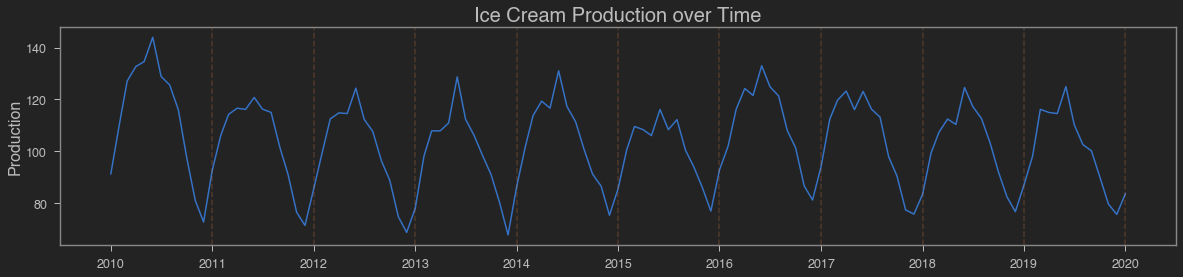

In [6]:
# plot data & set line on every year

plt.figure(figsize=(20,4))
plt.plot(df_ic.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='y', linestyle='--', alpha=0.2)

# ACF

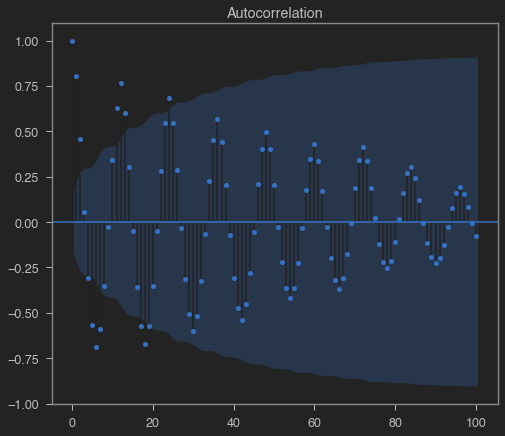

In [4]:
acf_plot = plot_acf(df_ic.production, lags=100)

#### Based on ACF, since its decaying overtime, most likely we are dealing with Auto Regressive process

# PACF

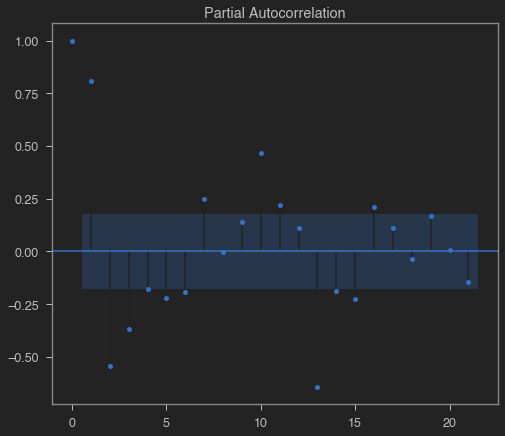

In [5]:
pacf_plot = plot_pacf(df_ic.production)

#### Based on PACF, Our good AR model will be good with lag 1,2,3,4,10,13

##### X(t+1) = b0 + b1*X(t-1) + b2*X(t-2) + b3*X(t-3) + b4*X(t-4) + b10*X(t-10) + b13*X(t-13)


# Analyse Stock

In [10]:
# get, clean data and set data from 2015-2020

import yfinance as yf
symbol = 'SPY'

data = yf.Ticker(symbol)
df = data.history(period='1d', start='2015-1-1', end='2020-1-1')
df = df[['Close']]
df.head()

,Close
Date,
2014-12-31,185.17
2015-01-02,185.07
2015-01-05,181.73
2015-01-06,180.02
2015-01-07,182.26


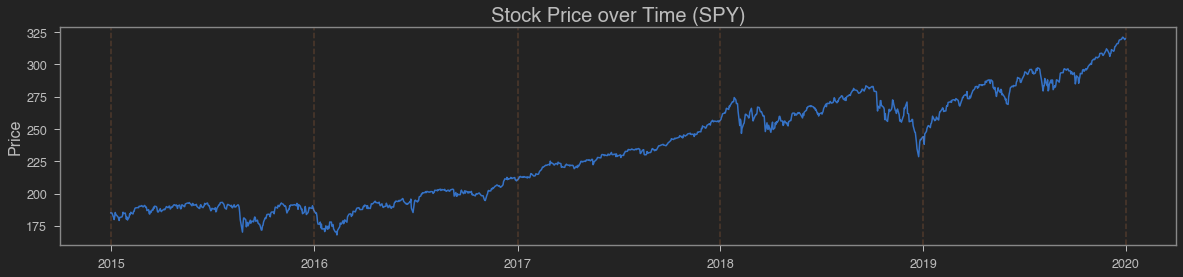

In [14]:
# plot data & set line in every year

plt.figure(figsize=(20,4))
plt.plot(df.Close)
plt.title('Stock Price over Time (%s)'%symbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='y', linestyle='--', alpha=0.2)

#### Data has an uptrend, need to be smoothened first (First order difference) | make it stationary

In [34]:
# first difference
first_diff = df.Close.values[1:] - df.Close.values[:-1]
first_diff = np.concatenate([first_diff, [0]])

# combine it with df
df['FirstDifference'] = first_diff
df.head()

,Close,FirstDifference
Date,,
2014-12-31,185.17,-0.10
2015-01-02,185.07,-3.34
2015-01-05,181.73,-1.71
2015-01-06,180.02,2.24
2015-01-07,182.26,3.23


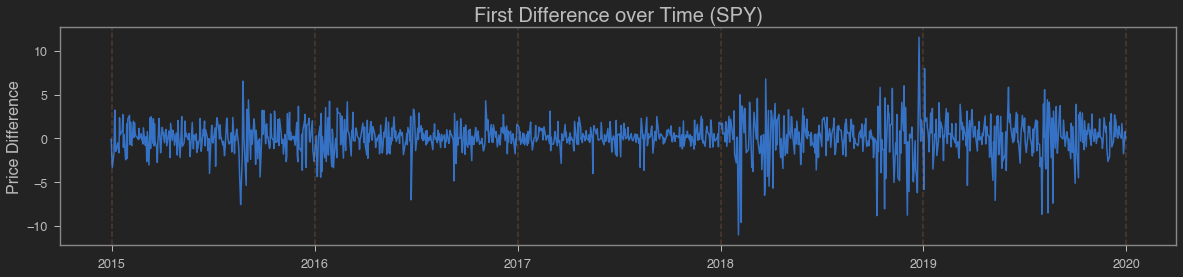

In [27]:
# Plot Stationa-ried data

plt.figure(figsize=(20,4))
plt.plot(df.FirstDifference)
plt.title('First Difference over Time (%s)'%symbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='y', linestyle='--', alpha=0.2)

### Data has no more trend, time to see ACF

# ACF

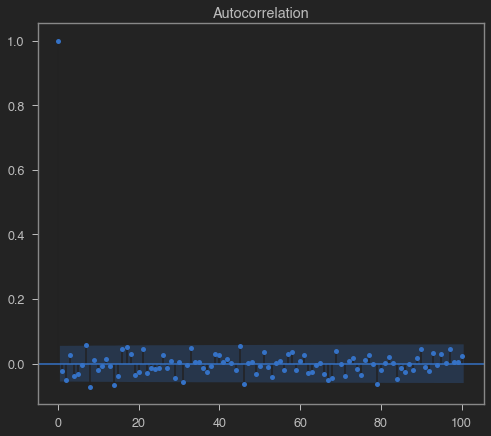

In [25]:
acf_plot = plot_acf(df.FirstDifference, lags=100)

#### ACF not helpful as none of the correlation stands out

# PACF

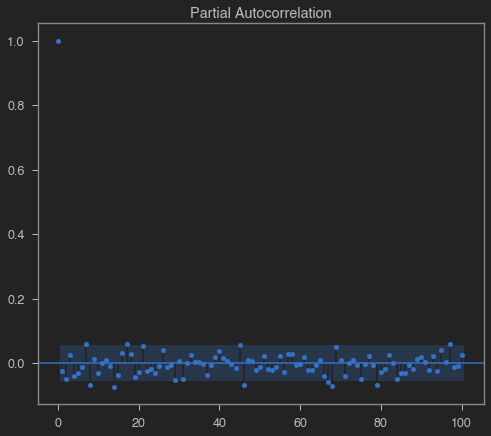

In [26]:
pacf_plot = plot_pacf(df.FirstDifference, lags=100)

#### PACF also doesnt tell much info